
## **Prediction of ICU requirement based on covid pre-condition data**

In [25]:
## Importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [26]:
## Loading the data

df = pd.read_csv('/content/covid.csv')
df.head()

,id,sex,patient_type,entry_date,date_symptoms,date_died,intubed,pneumonia,age,pregnancy,diabetes,copd,asthma,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu
0,16169f,2,1,04-05-2020,02-05-2020,9999-99-99,97,2,27,97,2,2,2,2,2,2,2,2,2,2,2,1,97
1,1009bf,2,1,19-03-2020,17-03-2020,9999-99-99,97,2,24,97,2,2,2,2,2,2,2,2,2,2,99,1,97
2,167386,1,2,06-04-2020,01-04-2020,9999-99-99,2,2,54,2,2,2,2,2,2,2,2,1,2,2,99,1,2
3,0b5948,2,2,17-04-2020,10-04-2020,9999-99-99,2,1,30,97,2,2,2,2,2,2,2,2,2,2,99,1,2
4,0d01b5,1,2,13-04-2020,13-04-2020,22-04-2020,2,2,60,2,1,2,2,2,1,2,1,2,2,2,99,1,2


**FEATURES OF THE DATA SET**

1. Id - The identification number of the patient.

2. Sex -  The sex of the patient. (Female -1, Male - 2)
3. Patient_type - The type of care received by the patient . It is called an outpatient if the paitent returned home or it is called an inpatient if they were admitted to hospital. (Outpatient - 1, Inpatient - 2)
4. Entry_date - The date of the patient's admission to the care unit.
5. Date_symptoms - The date on which the patient's symptoms began.
6. Date_died - The date the patient died. “9999-99-99” stands for recovered)
7. Intubed -  If the patient required intubation. (Yes - 1, No - 2, Data missing or NA - 97,98,99)
8. Pneumonia - If the patient was diagnosed with pneumonia. (Yes - 1, No - 2, Data missing or NA - 97,98,99)
9. Age - The age of the patient.
10. Pregnancy - If the patient is pregnant. (Yes - 1, No - 2, Data missing or NA - 97,98,99)
11. Diabetes - If the patient has a diagnosis of diabetes. (Yes - 1, No - 2, Data missing or NA - 97,98,99)
12. COPD - If the patient has a diagnosis of Chronic obstructive pulmonary disease (COPD). (Yes - 1, No - 2, Data missing or NA - 97,98,99)
13. Asthma - If the patient has a diagnosis of asthma. (Yes - 1, No - 2, Data missing or NA - 97,98,99)
14. Inmsupr - If the patient has immuno suppression that is weakened immune system. (Yes - 1, No - 2, Data missing or NA - 97,98,99)
15. Hypertension - If the patient has a diagnosis of hypertension. (Yes - 1, No - 2, Data missing or NA - 97,98,99)
16. Other_disease - If the patient has a diagnosis of other diseases. (Yes - 1, No - 2, Data missing or NA - 97,98,99)
17. Cardiovascular - If the patient has a diagnosis of cardiovascular disease. (Yes - 1, No - 2, Data missing or NA - 97,98,99)
18. Obesity - If the patient is diagnosed with obesity. (Yes - 1, No - 2, Data missing or NA - 97,98,99)
19. Renal_chronic - If the patient has a diagnosis of chronic kidney failure. (Yes - 1, No - 2, Data missing or NA - 97,98,99)
20. Tobacco - If the patient is a tobacco user. (Yes - 1, No - 2, Data missing or NA - 97,98,99)
21. Contact_other_covid - If the patient had contact with other Covid19 patient. (Yes - 1, No - 2, Data missing or NA - 97,98,99)
22. Covid_res - The result of the test. (Positive - 1, Negative - 2, Awaiting Results - 3)
23. ICU - If the patient required to enter an Intensive Care Unit. (Yes - 1, No - 2, Data missing or NA - 97,98,99)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 566602 entries, 0 to 566601
Data columns (total 23 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   id                   566602 non-null  object
 1   sex                  566602 non-null  int64 
 2   patient_type         566602 non-null  int64 
 3   entry_date           566602 non-null  object
 4   date_symptoms        566602 non-null  object
 5   date_died            566602 non-null  object
 6   intubed              566602 non-null  int64 
 7   pneumonia            566602 non-null  int64 
 8   age                  566602 non-null  int64 
 9   pregnancy            566602 non-null  int64 
 10  diabetes             566602 non-null  int64 
 11  copd                 566602 non-null  int64 
 12  asthma               566602 non-null  int64 
 13  inmsupr              566602 non-null  int64 
 14  hypertension         566602 non-null  int64 
 15  other_disease        566602 non-nu

In [28]:
## shape of the data

df.shape

(566602, 23)

## **Cleaning the Data**

In [29]:
## droping some columns

df.drop(columns={"id","patient_type", "entry_date","date_symptoms"}, axis=1, inplace=True)

In [30]:
## changing the date of dead column into dead: which gives 0 for the person alive and 1 for the person dead

df['date_died'] = df['date_died'].apply(lambda x: 0 if x == '9999-99-99' else 1)

In [31]:
df = df.rename(columns={'date_died': 'dead'})

In [32]:
df.head()

,sex,dead,intubed,pneumonia,age,pregnancy,diabetes,copd,asthma,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu
0,2,0,97,2,27,97,2,2,2,2,2,2,2,2,2,2,2,1,97
1,2,0,97,2,24,97,2,2,2,2,2,2,2,2,2,2,99,1,97
2,1,0,2,2,54,2,2,2,2,2,2,2,2,1,2,2,99,1,2
3,2,0,2,1,30,97,2,2,2,2,2,2,2,2,2,2,99,1,2
4,1,1,2,2,60,2,1,2,2,2,1,2,1,2,2,2,99,1,2


In [33]:
## replacing all other uncertain values as NAN

df=df.replace({97:np.nan,98:np.nan,99:np.nan})

In [34]:
## droping all the rows having NAN

df=df.dropna()

In [35]:
## counting the null elements in each column

df.isnull().sum()

sex                    0
dead                   0
intubed                0
pneumonia              0
age                    0
pregnancy              0
diabetes               0
copd                   0
asthma                 0
inmsupr                0
hypertension           0
other_disease          0
cardiovascular         0
obesity                0
renal_chronic          0
tobacco                0
contact_other_covid    0
covid_res              0
icu                    0
dtype: int64

In [36]:
## finding different sorts of age

df['age'].value_counts()

56.0     497
57.0     473
50.0     464
52.0     464
61.0     464
        ... 
100.0      7
101.0      4
102.0      2
105.0      1
115.0      1
Name: age, Length: 102, dtype: int64

In [37]:
## Categeroise age into 2 groups
## People aged below 50 or equal to 50 as "0"
## People from 51 yrs and above as "1"

df['age'] = df['age'].apply(lambda x: 0 if x <= 50 else 1)

In [38]:
## counting number of people under categeories "0" and "1"
df['age'].value_counts()

1    12400
0    10733
Name: age, dtype: int64

We observed in features that (df.[ "covid_res" ] == 3 ) for those whose test result is undeclared. For now let us put it as null and analyse only for them whose covid test result is declared.

In [39]:
df["covid_res"].value_counts()

1.0    11893
2.0     8436
3.0     2804
Name: covid_res, dtype: int64

In [40]:
## removing those rows with test result undeclared

df=df[df['covid_res'] != 3]

In [41]:
## checking wether they are removed

df["covid_res"].value_counts()

1.0    11893
2.0     8436
Name: covid_res, dtype: int64

In [55]:
df["dead"].value_counts()

0.0    16475
1.0     3854
Name: dead, dtype: int64

In [42]:
## rearranging indices from 0 

df = df.reset_index(drop=True)
df

,sex,dead,intubed,pneumonia,age,pregnancy,diabetes,copd,asthma,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu
0,1.0,0.0,2.0,2.0,0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0
1,1.0,0.0,2.0,2.0,1,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,1.0,1.0,1.0,2.0
2,1.0,0.0,2.0,1.0,1,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0
3,1.0,0.0,1.0,1.0,1,2.0,1.0,2.0,2.0,2.0,1.0,2.0,2.0,1.0,2.0,2.0,1.0,1.0,2.0
4,1.0,0.0,2.0,1.0,1,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20324,1.0,0.0,2.0,1.0,1,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
20325,1.0,0.0,2.0,2.0,0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
20326,1.0,1.0,1.0,2.0,0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0
20327,1.0,0.0,2.0,1.0,0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20329 entries, 0 to 20328
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   sex                  20329 non-null  float64
 1   dead                 20329 non-null  float64
 2   intubed              20329 non-null  float64
 3   pneumonia            20329 non-null  float64
 4   age                  20329 non-null  int64  
 5   pregnancy            20329 non-null  float64
 6   diabetes             20329 non-null  float64
 7   copd                 20329 non-null  float64
 8   asthma               20329 non-null  float64
 9   inmsupr              20329 non-null  float64
 10  hypertension         20329 non-null  float64
 11  other_disease        20329 non-null  float64
 12  cardiovascular       20329 non-null  float64
 13  obesity              20329 non-null  float64
 14  renal_chronic        20329 non-null  float64
 15  tobacco              20329 non-null 

In [44]:
## shape of the final dataframe after cleaning
df.shape

(20329, 19)

Let us change all the "2" as "0" so thta in the data we have only "0" and "1" in all columns

In [45]:
 ## save age and death
 
temp = df[['age','dead']]
df = df.replace({2 : 0})
df[['age','dead']] = temp

## **EDA**

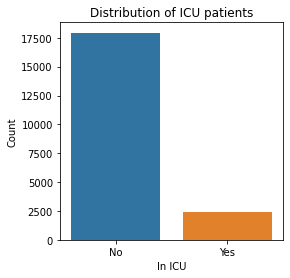

In [46]:
## Lets analyse more about ICU requirement
plt.figure(figsize=(4,4))
sns.countplot(x='icu',data=df)
plt.title('Distribution of ICU patients')
plt.xlabel('In ICU')
plt.ylabel('Count')
plt.xticks([0,1],['No','Yes'])
plt.show()

It says that most of the people are not admitted in ICU.


Now lets compare covid result and ICU admission

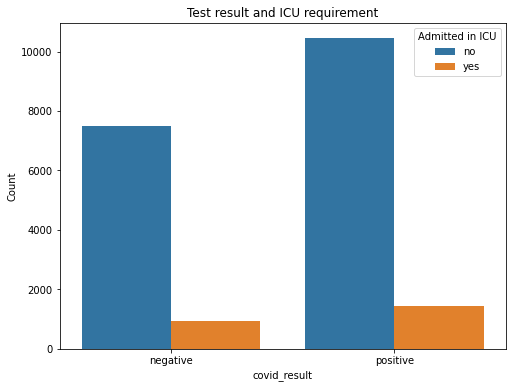

In [53]:
plt.figure(figsize=(8,6))

plot = sns.countplot(x='covid_res',hue='icu',data=df)
plot.legend_.set_title('Admitted in ICU')
labels = ['no','yes']
for text, label in zip(plot.legend_.texts, labels): 
    text.set_text(label)

plt.title('Test result and ICU requirement')
plt.xlabel('covid_result')
plt.ylabel('Count')
plt.xticks([1,0],['positive','negative'])

plt.show()

By this we can say that even people who tested negative also got admitted into icu.

Now we are going to compare death and icu admission 

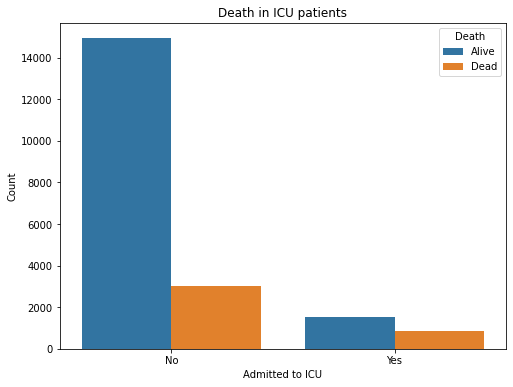

In [56]:
plt.figure(figsize=(8,6))

plot = sns.countplot(x='icu',hue='dead',data=df)
plot.legend_.set_title('Death')
labels = ['Alive','Dead']
for text, label in zip(plot.legend_.texts, labels): 
    text.set_text(label)

plt.title('Death in ICU patients')
plt.xlabel('Admitted to ICU')
plt.ylabel('Count')
plt.xticks([0,1],['No','Yes'])

plt.show()

Now let's compare the icu admission with various heatlth complications of the patient.

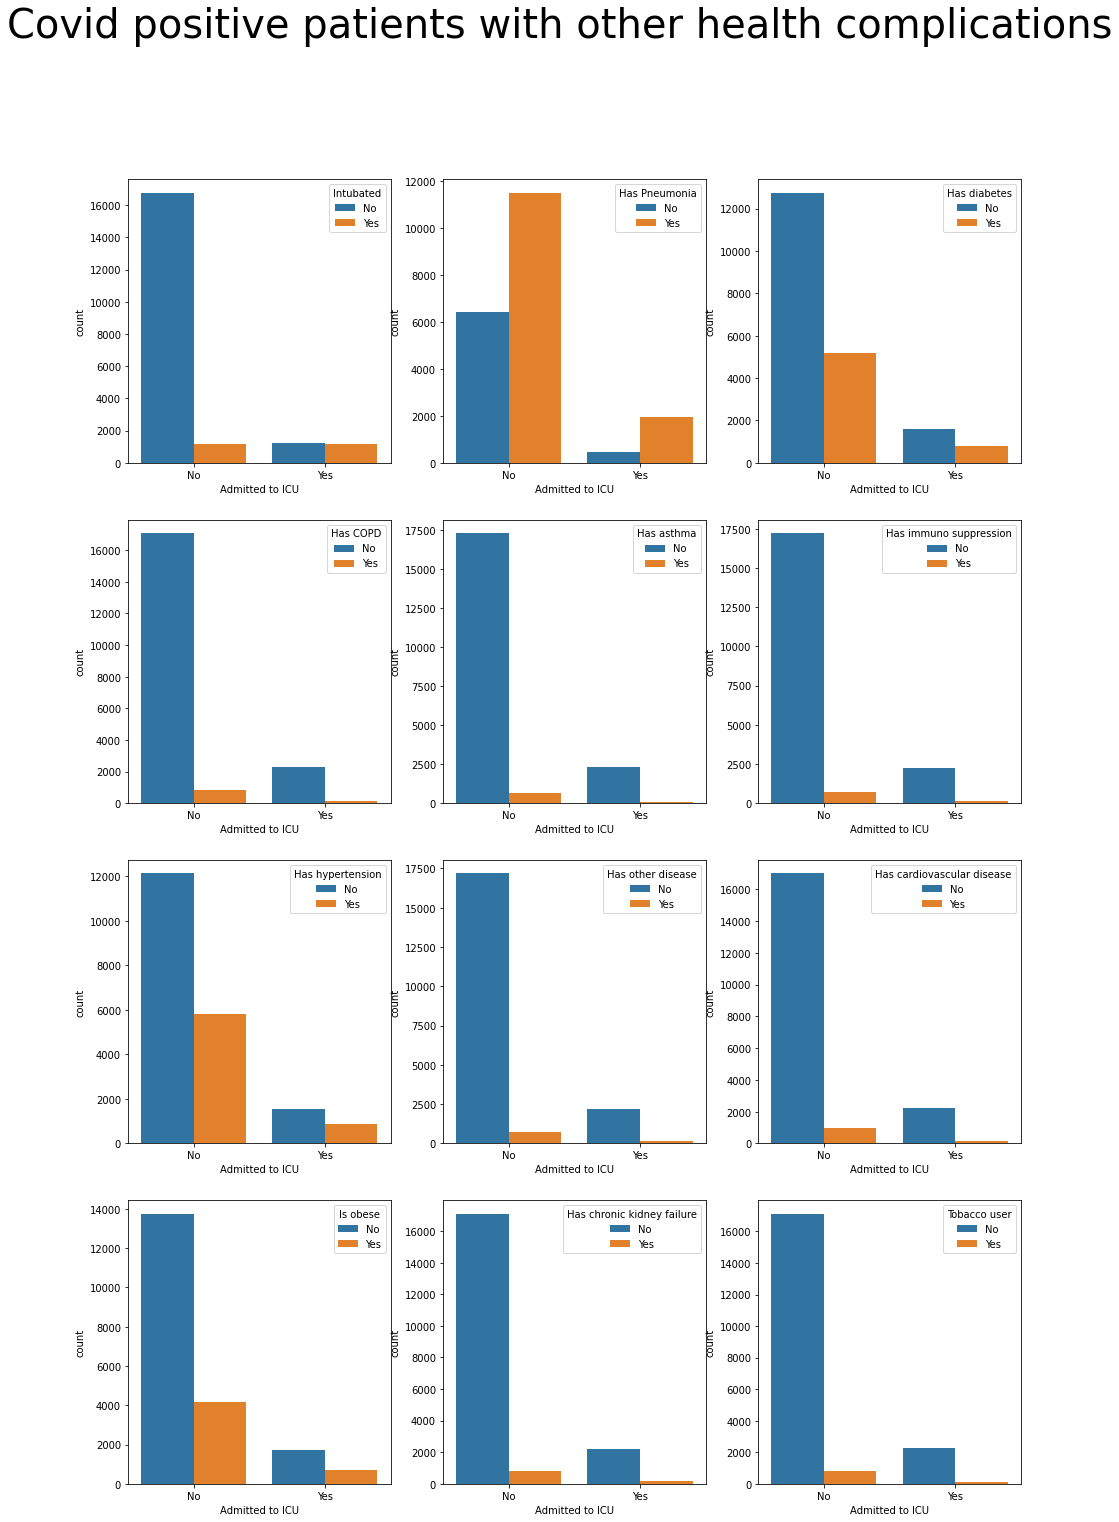

In [66]:
columns = [['intubed', 'Intubated'],['pneumonia', 'Has Pneumonia'],['diabetes', 'Has diabetes'],
    ['copd', 'Has COPD'],['asthma', 'Has asthma'],['inmsupr', 'Has immuno suppression'],
    ['hypertension', 'Has hypertension'],['other_disease', 'Has other disease'],
    ['cardiovascular', 'Has cardiovascular disease'],['obesity', 'Is obese'],
    ['renal_chronic', 'Has chronic kidney failure'],['tobacco','Tobacco user']]


legend = ['No','Yes']

fig,ax = plt.subplots(nrows=4,ncols=3,figsize=(16,24))

counter = 0
for row in range(4):
    for column in range(3):  
        plot = sns.countplot(x='icu',hue=columns[counter][0],data=df,ax=ax[row][column])
        plot.legend_.set_title(columns[counter][1])
        for text, label in zip(plot.legend_.texts, legend): 
            text.set_text(label) 
        ax[row][column].set_xlabel('Admitted to ICU')
        ax[row][column].set_xticks(range(2))
        ax[row][column].set_xticklabels(['No','Yes'])
        counter+=1
        if row == 3 and column == 2:
            break

plt.suptitle('Covid positive patients with other health complications',fontsize=40)
plt.show()

From this we can infer that more percent of people who are intubated  or having pneumonia, hypertension, diabetes are admitted to the ICU

## **MODEL BUILDING**

In [67]:
## Separating the data into X and y 
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [68]:
## splitting the data into test and train data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=89) 
# here we took 90% data as training data and 10% data as test data and random state is 89

In [69]:
## defining logistic regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [71]:
## fitting train data into the model and prediting for the test data
lr.fit(X_train,y_train)
lr_pred = lr.predict(X_test)

In [72]:
## finding the accuracy of the model
lr.score(X_test,y_test)

0.8819478603049681

In [73]:
## finding the error
from sklearn.metrics import mean_squared_error
msq_er = mean_squared_error(y_test, lr_pred)
print(msq_er)

0.11805213969503198


Hence finallly attained an accuracy of 88% for the logistic regression model